In [1]:
!pip install pennylane==0.29.0
!pip install strawberryfields
!pip install pennylane-sf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 73.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 15.6 MB/s eta 0:00:0

In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt
import random

In [3]:
np.random.seed(1)

In [7]:
# Create noise list
noise_list = np.random.randn(100)

In [8]:
dev = qml.device('strawberryfields.fock', wires=1, cutoff_dim=10)

In [9]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)

    #Bias
    qml.Displacement(v[3], 0.0, wires=0)

    # Element-wise nonlinear transformation
    qml.Kerr(v[4], wires=0)

In [10]:
@qml.qnode(dev)
def quantum_neural_net(var, x):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # "layer" subcircuits
    for v in var:
        layer(v)

    return qml.expval(qml.X(0))

In [11]:
# Set parameters
num_layers = 6
var_init = 0.05 * np.random.randn(num_layers, 5, requires_grad=True)
var = var_init

#variables
f0 = 9.8
qnn0 = quantum_neural_net(var,0)
e = 10**(-5)
const = 9.8
train_data_num = 100
upper_limit_of_train_data = 20
lower_limit_of_train_data = 0

In [12]:
#defining the ODE
def f(x, noise):
    return -9.8*np.exp(-x) + 0.1*noise

In [13]:
def qnn(var,x):
    return quantum_neural_net(var,x)

In [14]:
def loss(var):
    L = 0
    qnn0 = qnn(var,0)

    for i, x in enumerate(np.linspace(lower_limit_of_train_data,upper_limit_of_train_data,train_data_num)):
        dQNN = (const*qnn(var,x+e)-const*qnn(var,x-e))/(2*e)
        L = L + (dQNN - f(x, noise_list[i].item()))**2

    L = L + (qnn0-f0)**2
    return L

In [15]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

In [16]:
Loss_series = []

In [17]:
for it in range(250):
    var, _loss = opt.step_and_cost(loss, var)
    Loss_series.append(_loss)
    print("Iter: {:5d} | Loss: {:0.7f} ".format(it, _loss))

Iter:     0 | Loss: 6448.4584329 
Iter:     1 | Loss: 4090.7981298 
Iter:     2 | Loss: 4374.3419959 
Iter:     3 | Loss: 3387.0490137 
Iter:     4 | Loss: 2376.8229506 
Iter:     5 | Loss: 2193.8053831 
Iter:     6 | Loss: 2066.9734524 
Iter:     7 | Loss: 1650.6943041 
Iter:     8 | Loss: 1184.5067595 
Iter:     9 | Loss: 967.4729507 
Iter:    10 | Loss: 999.3041859 
Iter:    11 | Loss: 1014.4978572 
Iter:    12 | Loss: 895.5906205 
Iter:    13 | Loss: 727.5932882 
Iter:    14 | Loss: 635.3044012 
Iter:    15 | Loss: 645.5706336 
Iter:    16 | Loss: 690.2117862 
Iter:    17 | Loss: 703.1597662 
Iter:    18 | Loss: 669.7019875 
Iter:    19 | Loss: 615.4644326 
Iter:    20 | Loss: 576.4540909 
Iter:    21 | Loss: 569.8808157 
Iter:    22 | Loss: 582.2380848 
Iter:    23 | Loss: 585.7525080 
Iter:    24 | Loss: 565.1567122 
Iter:    25 | Loss: 527.3704503 
Iter:    26 | Loss: 490.5243704 
Iter:    27 | Loss: 467.1338674 
Iter:    28 | Loss: 456.4043005 
Iter:    29 | Loss: 448.9053035 


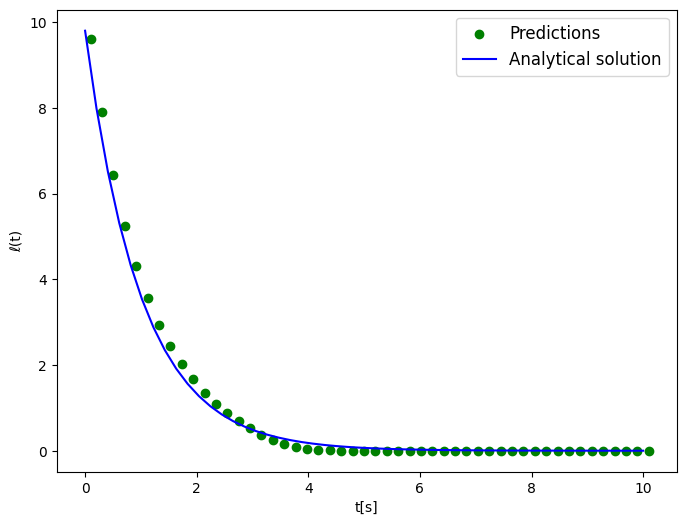

In [20]:
# Calculate time evolution of ell
x_pred = np.linspace(0.1, 10.1, 50)
predictions = [9.8*quantum_neural_net(var, x_) for x_ in x_pred]

# Analytical solution
t = np.linspace(0, 10, 50)
y = 9.8*np.exp(-t)

# Plot ell graph
plt.figure(figsize=(8,6))
plt.scatter(x_pred, predictions, color="green",
            label="Predictions")
plt.plot(t,y,'b',label="Analytical solution")
plt.xlabel("t[s]")
plt.ylabel("ℓ(t)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.legend(loc="upper right", fontsize=12)
plt.show()

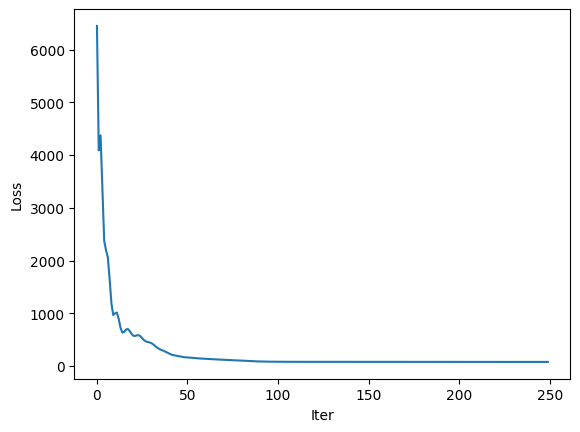

In [21]:
# Plot loss graph 
plt.xlabel("Iter")
plt.ylabel("Loss")
plt.plot(Loss_series)

In [22]:
from scipy.integrate import solve_ivp

In [23]:
# Calculate result of RK method
# Initial Values
T_INITIAL = 0  # [s]
V_INITIAL = 0  # [m/s]

# Params for Phys.
k = 1  # [1/s]
g = 9.8  # [m/s]

# Params for Calc.
T_FINAL = 10  # [s]
T_STEP = 0.1  # [s]

In [24]:
def derivative(t, v):  # Solver needs the variable t
    return g - k * v


def plot(t, v):
    plt.figure(figsize=(8, 6))
    plt.plot(t, v, '-o')
    plt.hlines([g], T_INITIAL, T_FINAL, "red", linestyles='dashed')
    plt.xlim([T_INITIAL, T_FINAL])
    plt.xlabel('t [s]')
    plt.ylabel('v (downward) [m/s]')
    plt.title(f'Velocity of a falling raindrop (g={g} [m/s^2], k={k} [1/s])')
    plt.show()


def main():
    n_steps = (T_FINAL - T_INITIAL) / T_STEP
    t_eval = T_INITIAL + np.arange(0, n_steps) * T_STEP
    result = solve_ivp(derivative, [T_INITIAL, T_FINAL], [V_INITIAL], t_eval=t_eval)

    if not result.success:
        print('Failed to solve!')
        return

    plot(result.t, result.y[0])  # solve_ivp returns t and multi-dimensional y
    return result

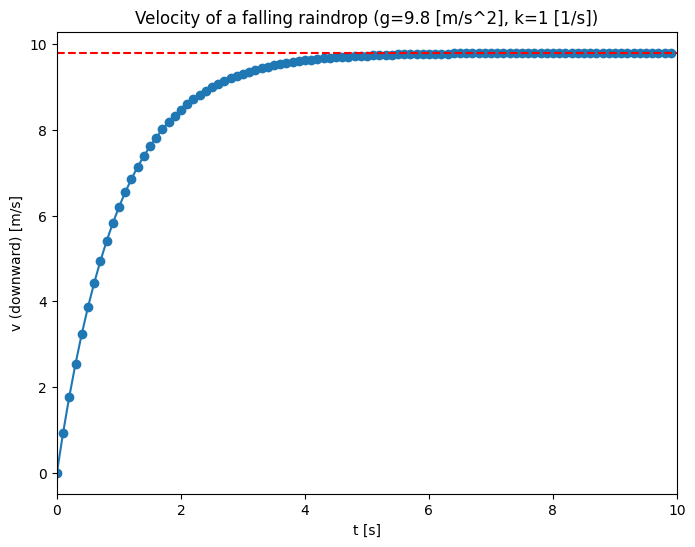

In [25]:
result=main()

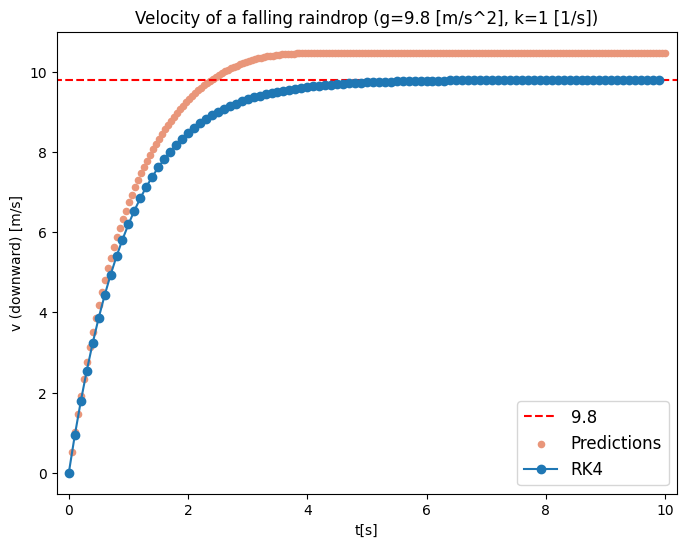

In [32]:
# Calculate time evolution of downward velocity
x_pred = np.linspace(0, 10, 200)
predictions = [9.8*quantum_neural_net(var, x_) for x_ in x_pred]
# Initial velocity
v = 0
v_list = [0]
for i in range(len(predictions)-1):
  v += (10 / 200) * ((predictions[i].item() + predictions[i+1].item())/2)
  v_list.append(v)

t = np.linspace(0, 10, 200)

# Plot downward velocity graph
plt.figure(figsize=(8,6))
plt.title(f'Velocity of a falling raindrop (g={g} [m/s^2], k={k} [1/s])')
plt.hlines([9.8], -5, 15, color="red", linestyle="dashed",
           label="9.8")
plt.scatter(x_pred, v_list, color="darksalmon", s=20,
            label="Predictions")
plt.plot(result.t, result.y[0], "-o" ,label="RK4")
plt.xlabel("t[s]")
plt.ylabel("v (downward) [m/s]")
plt.xlim([-0.2,10.2])
plt.tick_params(axis="both", which="major")
plt.legend(loc="lower right",fontsize=12)
plt.show()
